In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.pipeline import Pipeline

### Get fit data ready

In [2]:
# ValueError: could not convert string to float: '8789-0'
def read_data_partial(given_fname, output_fname, lim=399999):
    try:
        data = pd.read_csv(given_fname,index_col=False,engine='python',nrows=lim)
        data.to_csv(output_fname)
    except:
        content = []
        count = 1

        with open(given_fname, 'r') as fr:
            for line in fr:
                if count <= lim:
                    #print(type(line), line)
                    content.append(line)
                    count += 1
        with open(output_fname, 'w') as fw:
            for line in content:
                # print(type(line), line)
                fw.write(line)

        data = pd.read_csv(output_fname, index_col=False,encoding= res_encoding,engine='python')

    return data

In [3]:
qso_train_partial = read_data_partial('quasar_train_catalog.csv', 'qso_train_partial.csv')
qso_train_drop = qso_train_partial[['z', 'r_LSST_magerr', 'i_LSST_magerr','i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
qso_train_drop = qso_train_drop.replace(99.99, np.nan).dropna()
qso_train_drop = qso_train_drop[qso_train_drop['z'] < 7.5]
qso_train_drop = qso_train_drop[(qso_train_drop['r_LSST_magerr']>0.2)&(qso_train_drop['i_LSST_magerr']>0.2)]
redshifts26 = qso_train_drop[qso_train_drop['z_LSST_mag'] > 22.0]
redshifts26 = redshifts26[redshifts26['z_LSST_mag'] < 26.0]
redshifts26 = redshifts26['z']
qso_train_drop = qso_train_drop.drop(columns=['z', 'r_LSST_magerr', 'i_LSST_magerr'])
print('qso_train_catalog_z.csv partial data description: ')
qso_train_drop.describe()

qso_train_catalog_z.csv partial data description: 


,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,20759.000000,20759.000000,20759.000000,20759.000000,20759.000000,20759.000000
mean,28.576193,26.616020,24.340320,24.201112,24.264969,24.132527
std,1.218340,1.654428,2.009015,2.089360,2.112093,2.108081
min,26.672280,23.064283,18.489759,17.989148,17.800595,17.633615
25%,27.689657,25.314514,23.136710,22.977195,23.069490,22.937156
50%,28.366448,26.540555,24.371926,24.306130,24.363508,24.192066
75%,29.189413,27.668971,25.789820,25.697926,25.766767,25.595761
max,38.902328,36.769079,32.115011,32.168396,32.742341,33.953075


(array([1986., 1725., 1511., 1102.,   95.,   74.,  366.,  489.,  380.,
         271.]),
 array([6.0001027 , 6.15004544, 6.29998818, 6.44993092, 6.59987366,
        6.7498164 , 6.89975914, 7.04970188, 7.19964462, 7.34958736,
        7.4995301 ]),
 <BarContainer object of 10 artists>)

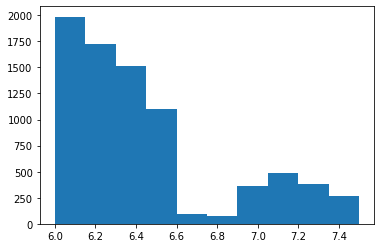

In [4]:
plt.hist(redshifts26)

In [5]:
# brown dwarf contaminants
mlt_train_partial = read_data_partial('mlt_train_catalog.csv', 'mlt_train_partial.csv', 599999)
mlt_train_drop = mlt_train_partial[['r_LSST_magerr', 'i_LSST_magerr', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
mlt_train_drop = mlt_train_drop.replace(99.99, np.nan).dropna()
mlt_train_drop = mlt_train_drop[(mlt_train_drop['r_LSST_magerr']>0.2)&(mlt_train_drop['i_LSST_magerr']>0.2)]
mlt_train_drop = mlt_train_drop.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
print('mlt_train_catalog_z.csv partial data description: ')
mlt_train_drop.describe()

mlt_train_catalog_z.csv partial data description: 


,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,40215.000000,40215.000000,40215.000000,40215.000000,40215.000000,40215.000000
mean,27.846360,26.406950,24.814468,24.240156,23.941957,23.954919
std,0.866560,0.814595,0.652294,0.636044,0.633295,0.639822
min,26.565172,24.640153,22.966413,22.249321,21.884903,21.705643
25%,27.248318,25.848575,24.336096,23.782861,23.500746,23.511528
50%,27.631539,26.262382,24.722558,24.157091,23.877018,23.890470
75%,28.184954,26.792510,25.207169,24.619578,24.324022,24.337251
max,38.215437,36.198974,28.369839,27.735964,27.180561,27.305963


In [6]:
galaxies_patch8789_partial = read_data_partial('galaxies_train_catalog_patch8789.csv', 'galaxies_patch8789_partial.csv')
galaxies_patch8789_drop = galaxies_patch8789_partial[['r_LSST_magerr', 'i_LSST_magerr','i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
galaxies_patch8789_drop = galaxies_patch8789_drop.replace(99.99, np.nan).dropna()
galaxies_patch8789_drop = galaxies_patch8789_drop[(galaxies_patch8789_drop['r_LSST_magerr']>0.2)&(galaxies_patch8789_drop['i_LSST_magerr']>0.2)]
galaxies_patch8789_drop = galaxies_patch8789_drop.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
print('galaxies_train_catalog_patch8789.csv partial data description: ')
galaxies_patch8789_drop.describe()

galaxies_train_catalog_patch8789.csv partial data description: 


,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,166180.000000,166180.000000,166180.000000,166180.000000,166180.000000,166180.000000
mean,28.112741,27.507701,27.330679,27.226355,27.160891,27.154280
std,0.888656,0.950758,0.788433,0.796900,0.827853,0.977009
min,26.647539,25.462982,25.152190,24.748167,24.475726,24.258516
25%,27.518918,26.883531,26.837638,26.737179,26.657671,26.557470
50%,27.920273,27.314756,27.248012,27.172407,27.118375,27.041903
75%,28.465759,27.895376,27.710084,27.634895,27.594613,27.601858
max,40.029429,39.261958,39.647494,40.707497,38.204669,38.379259


In [7]:
galaxies_patch8786_partial = read_data_partial('galaxies_train_catalog_patch8786.csv', 'galaxies_patch8786_partial.csv')
galaxies_patch8786_drop = galaxies_patch8786_partial[['r_LSST_magerr', 'i_LSST_magerr','i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
galaxies_patch8786_drop = galaxies_patch8786_drop.replace(99.99, np.nan).dropna()
galaxies_patch8786_drop = galaxies_patch8786_drop[(galaxies_patch8786_drop['r_LSST_magerr']>0.2)&(galaxies_patch8786_drop['i_LSST_magerr']>0.2)]
galaxies_patch8786_drop = galaxies_patch8786_drop.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
print('galaxies_train_catalog_patch8786.csv partial data description: ')
galaxies_patch8786_drop.describe()

galaxies_train_catalog_patch8786.csv partial data description: 


,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,156947.000000,156947.000000,156947.000000,156947.000000,156947.000000,156947.000000
mean,28.100850,27.494201,27.312886,27.205306,27.141588,27.131087
std,0.886176,0.952283,0.787836,0.803831,0.842035,0.981599
min,26.573603,25.553776,25.107279,24.705397,24.460871,24.280885
25%,27.507437,26.871509,26.818015,26.714655,26.633409,26.535319
50%,27.905555,27.298765,27.235464,27.156027,27.102194,27.024863
75%,28.452905,27.883030,27.697065,27.620381,27.584424,27.588149
max,40.812877,40.422024,37.436853,38.037623,37.411129,37.630643


In [8]:
qso_train_drop['label'] = np.ones(len(qso_train_drop))
mlt_train_drop['label'] = np.zeros(len(mlt_train_drop))
galaxies_patch8789_drop['label'] = np.zeros(len(galaxies_patch8789_drop))
galaxies_patch8786_drop['label'] = np.zeros(len(galaxies_patch8786_drop))

In [9]:
# data concatenation to get training data
contaminants_drop = pd.concat([mlt_train_drop, galaxies_patch8789_drop, galaxies_patch8786_drop], ignore_index=True)
data_train_drop = pd.concat([qso_train_drop, contaminants_drop], ignore_index=True) # make sure that the data line up
X_drop = data_train_drop[['i_LSST_mag', 'z_LSST_mag','Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
Y_drop = data_train_drop['label']

In [10]:
qso_train_26 = qso_train_drop[qso_train_drop['z_LSST_mag'] > 24.0]
qso_train_26 = qso_train_26[qso_train_26['z_LSST_mag'] < 26.0]
print(len(qso_train_26))
mlt_train_26 = mlt_train_drop[mlt_train_drop['z_LSST_mag'] > 24.0]
mlt_train_26 = mlt_train_26[mlt_train_26['z_LSST_mag'] < 26.0]
print(len(mlt_train_26))
galaxies_patch8789_26 = galaxies_patch8789_drop[galaxies_patch8789_drop['z_LSST_mag'] > 24.0]
galaxies_patch8789_26 = galaxies_patch8789_26[galaxies_patch8789_26['z_LSST_mag'] < 26.0]
print(len(galaxies_patch8789_26))
galaxies_patch8786_26 = galaxies_patch8786_drop[galaxies_patch8786_drop['z_LSST_mag'] > 24.0]
galaxies_patch8786_26 = galaxies_patch8786_26[galaxies_patch8786_26['z_LSST_mag'] < 26.0]
print(len(galaxies_patch8786_26))

7514
13791
778
753


In [11]:
contaminants_26 = pd.concat([mlt_train_26, galaxies_patch8789_26, galaxies_patch8786_26], ignore_index=True)
data_train_26 = pd.concat([qso_train_26, contaminants_26], ignore_index=True)
X_drop_26 = data_train_26[['i_LSST_mag', 'z_LSST_mag','Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
Y_drop_26 = data_train_26['label']

## KNN filters

In [12]:
# 1a
# x: z_LSST_mag-J_WFI_mag
# y: Y_WFI_mag-H_WFI_mag
# best score:  0.9881756756756758
filter1a = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=13, leaf_size=3, weights='uniform', p=3)
features1a = [X_drop_26['z_LSST_mag']-X_drop_26['J_WFI_mag'], X_drop_26['Y_WFI_mag']-X_drop_26['H_WFI_mag']]
X1a = np.array(features1a).transpose()

filter1a.fit(X1a, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=13, p=3)

In [13]:
# 1b
# x: Y - H 
# y: i - H
# best score:  0.9938063063063063
filter1b = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=13, leaf_size=3, weights='uniform', p=5)
features1b = [X_drop_26['Y_WFI_mag']-X_drop_26['H_WFI_mag'], X_drop_26['i_LSST_mag']-X_drop_26['H_WFI_mag']]
X1b = np.array(features1b).transpose()

filter1b.fit(X1b, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=13, p=5)

In [14]:
# 1c 
# x: z - H
# y: J - H
# best score:  0.9463213213213213
filter1c = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=36, leaf_size=3, weights='uniform', p=5)
features1c = [X_drop_26['z_LSST_mag']-X_drop_26['H_WFI_mag'], X_drop_26['J_WFI_mag']-X_drop_26['H_WFI_mag']]
X1c = np.array(features1c).transpose()

filter1c.fit(X1c, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=36, p=5)

In [15]:
# 1d
# x: z_LSST_mag-Y_WFI_mag
# y: i_LSST_mag-F_WFI_mag
# best score:  0.9678428428428428
filter1d = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=45, leaf_size=3, weights='uniform', p=5)
features1d = [X_drop_26['z_LSST_mag']-X_drop_26['Y_WFI_mag'], X_drop_26['i_LSST_mag']-X_drop_26['F_WFI_mag']]
X1d = np.array(features1d).transpose()

filter1d.fit(X1d, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=45, p=5)

In [16]:
# 1e
# Y - J
# J - H
# best score: deleted, assume 0.95
filter1e = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=26, leaf_size=3, weights='uniform', p=3)
features1e = [X_drop_26['Y_WFI_mag']-X_drop_26['J_WFI_mag'], X_drop_26['J_WFI_mag']-X_drop_26['H_WFI_mag']]
X1e = np.array(features1e).transpose()

filter1e.fit(X1e, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=26, p=3)

In [17]:
# 1f
# x: i - Y
# y: J - H
# best score:  0.9161036036036035
filter1f = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=26, leaf_size=3, weights='uniform', p=3)
features1f = [X_drop_26['i_LSST_mag']-X_drop_26['Y_WFI_mag'], X_drop_26['J_WFI_mag']-X_drop_26['H_WFI_mag']]
X1f = np.array(features1f).transpose()

filter1f.fit(X1f, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=26, p=3)

# Test

In [20]:
# retrieve redshift for later usage
qso_test = pd.read_csv('quasar_test_catalog.csv', index_col=False)
qso_test = qso_test[['z', 'r_LSST_magerr', 'i_LSST_magerr', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
qso_test = qso_test.replace(99.99, np.nan).dropna()
qso_test = qso_test[(qso_test['r_LSST_magerr']>0.2)&(qso_test['i_LSST_magerr']>0.2)]
qso_test = qso_test.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
# qso_test = qso_test[(qso_test['z']>7.0)&(qso_test['z']<7.5)]
qso_test.describe()

,z,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000
mean,6.334597,28.835404,26.798711,25.931247,25.903342,25.938094,25.724927
std,0.310122,1.238984,1.679970,1.773994,1.803031,1.796843,1.760516
min,6.000191,26.618546,23.163809,20.452226,20.223916,20.227606,20.164541
25%,6.104868,27.976921,25.507942,24.531768,24.504636,24.559612,24.386106
50%,6.244405,28.662272,26.856947,25.846617,25.823882,25.846930,25.666564
75%,6.469143,29.429633,27.855877,27.204031,27.190811,27.212475,26.946348
max,8.482816,35.495708,36.798806,35.672331,33.879891,34.514265,34.228085


In [21]:
galaxies_patch8788 = read_data_partial('galaxies_train_catalog_patch8788.csv', 'galaxies_patch8788_245.csv', 30000)
galaxies_patch8788 = galaxies_patch8788.replace(99.99, np.nan).dropna()
galaxies_patch8788 = galaxies_patch8788[['z', 'r_LSST_magerr', 'i_LSST_magerr','i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
galaxies_patch8788_26 = galaxies_patch8788[(galaxies_patch8788['r_LSST_magerr']>0.2)&(galaxies_patch8788['i_LSST_magerr']>0.2)]
galaxies_patch8788_26 = galaxies_patch8788.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
print('galaxies_train_catalog_patch8788.csv data description: ')
galaxies_patch8788.describe()

galaxies_train_catalog_patch8788.csv data description: 


,z,r_LSST_magerr,i_LSST_magerr,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000
mean,1.032609,0.071881,0.074232,25.064565,24.472561,24.263562,24.133942,24.032490,23.970953
std,0.014266,0.336052,0.207255,1.258280,1.250795,1.294158,1.348217,1.403003,1.451221
min,1.005989,0.010337,0.010588,20.738443,20.199310,19.730171,19.315425,18.971169,18.750817
25%,1.020363,0.025039,0.027430,24.321473,23.749411,23.524088,23.357096,23.211484,23.120767
50%,1.033982,0.045740,0.049470,25.208614,24.607205,24.439207,24.332423,24.249539,24.205313
75%,1.045150,0.079893,0.086826,25.930392,25.342387,25.182842,25.094375,25.045359,25.005333
max,1.055212,43.286299,23.300493,32.004925,31.083271,28.285061,28.161714,30.885336,32.729688


In [22]:
mlt_test = read_data_partial('mlt_test_catalog_z.csv', 'mlt_test_catalog_z26.csv', 120000)
mlt_test = mlt_test[['spt', 'r_LSST_magerr', 'i_LSST_magerr', 'z_LSST_magerr', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
mlt_test = mlt_test.replace(99.99, np.nan).dropna()
mlt_test = mlt_test[(mlt_test['r_LSST_magerr']>0.2)&(mlt_test['i_LSST_magerr']>0.2)]
mlt_test = mlt_test.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
mlt_test['z'] = np.zeros(mlt_test.shape[0])
print('mlt_test_catalog partial data description: ')
mlt_test.describe()

mlt_test_catalog partial data description: 


,spt,z_LSST_magerr,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,z
count,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000,16164.0
mean,13.067001,0.141333,27.294287,25.684152,24.222748,23.659324,23.357716,23.372401,0.0
std,2.983720,0.029496,0.388016,0.231342,0.295505,0.317678,0.377004,0.388734,0.0
min,7.000000,0.049642,26.601001,24.571247,22.301314,22.013013,21.873094,21.742619,0.0
25%,11.000000,0.119846,27.036202,25.538164,24.027244,23.452812,23.114613,23.130337,0.0
50%,13.000000,0.141910,27.206518,25.726646,24.225623,23.658451,23.360445,23.377344,0.0
75%,15.000000,0.163258,27.458651,25.871890,24.418692,23.872214,23.612628,23.627727,0.0
max,29.000000,0.239621,32.622297,25.999972,25.767020,25.011076,24.808649,25.154299,0.0


In [23]:
qso_test_copy = qso_test.copy()
qso_test_copy['label'] = np.ones(len(qso_test_copy))
qso_test_copy['spt'] = np.zeros(len(qso_test_copy))
galaxies_patch8788_copy = galaxies_patch8788.copy()
galaxies_patch8788_copy['label'] = np.zeros(len(galaxies_patch8788_copy))
galaxies_patch8788_copy['spt'] = np.zeros(len(galaxies_patch8788_copy))

In [24]:
mlt_test_copy = mlt_test.copy()
mlt_test_copy['label'] = np.zeros(len(mlt_test_copy))
mlt_test_26 = mlt_test[(mlt_test['z_LSST_mag']>24.0)&(mlt_test['z_LSST_mag']<26.0)]
test0 = pd.concat([qso_test_copy, galaxies_patch8788_copy, mlt_test_copy], ignore_index=True).drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
test = test0[['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag', 'label']]
test.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label
count,41184.000000,41184.000000,41184.000000,41184.000000,41184.000000,41184.000000,41184.000000
mean,26.330656,25.189267,24.420450,24.131116,23.965228,23.917886,0.103681
std,1.684789,1.313506,1.211908,1.305913,1.390285,1.377839,0.304850
min,20.738443,20.199310,19.730171,19.315425,18.971169,18.750817,0.000000
25%,25.199695,24.538908,23.929998,23.468960,23.182110,23.174899,0.000000
50%,26.869211,25.478009,24.318858,23.886534,23.682393,23.670638,0.000000
75%,27.317233,25.843108,24.892854,24.774591,24.718586,24.663740,0.000000
max,35.495708,36.798806,35.672331,33.879891,34.514265,34.228085,1.000000


In [25]:
test_copy = test.copy()
test_copy = test_copy[test_copy['z_LSST_mag'] > 24.0]
test_copy = test_copy[test_copy['z_LSST_mag'] < 26.0]

In [26]:
print(len(test_copy[test_copy['label'] == 1]))

1344


In [27]:
print(len(test_copy))

29983


individual filters:

In [26]:
# x: z - J
# y: Y - H
testf_1a = [test_copy['z_LSST_mag']-test_copy['J_WFI_mag'], test_copy['Y_WFI_mag']-test_copy['H_WFI_mag']]
print('test features okay')
prob_1a = filter1a.predict_proba(np.array(testf_1a).transpose())
print('prediction okay')
# prob_1a: [prob of negative class, prob of positive class]
test_copy['prob_1a'] = prob_1a[:, 1]

test features okay
prediction okay


In [27]:
# x: Y - H 
# y: i - H

prob_1b = filter1b.predict_proba(np.array([test_copy['Y_WFI_mag']-test_copy['H_WFI_mag'], test_copy['i_LSST_mag']-test_copy['H_WFI_mag']]).transpose())

test_copy['prob_1b'] = prob_1b[:, 1]

In [28]:
# x: z - H
# y: J - H

prob_1c = filter1c.predict_proba(np.array([test_copy['z_LSST_mag']-test_copy['H_WFI_mag'], test_copy['J_WFI_mag']-test_copy['H_WFI_mag']]).transpose())

test_copy['prob_1c'] = prob_1c[:, 1]

In [29]:
# x: z - Y
# y: i - Y

prob_1d = filter1d.predict_proba(np.array([test_copy['z_LSST_mag']-test_copy['Y_WFI_mag'], test_copy['i_LSST_mag']-test_copy['Y_WFI_mag']]).transpose())

test_copy['prob_1d'] = prob_1d[:, 1]

In [30]:
# x: Y - J
# y: J - H

prob_1e = filter1e.predict_proba(np.array([test_copy['Y_WFI_mag']-test_copy['J_WFI_mag'], test_copy['J_WFI_mag']-test_copy['H_WFI_mag']]).transpose())

test_copy['prob_1e'] = prob_1e[:, 1]

In [31]:
# x: i - Y
# y: J - H

prob_1f = filter1f.predict_proba(np.array([test_copy['i_LSST_mag']-test_copy['Y_WFI_mag'], test_copy['J_WFI_mag']-test_copy['H_WFI_mag']]).transpose())

test_copy['prob_1f'] = prob_1f[:, 1]

In [32]:
# use best scores as weights:
weights = [0.9882, 0.9938, 0.9463, 0.9678, 0.95, 0.9161]
probabilities = test_copy[['prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f']]
cols = ['prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f']

wprob = np.zeros(len(probabilities['prob_1a']))
for i in range(len(weights)):
    sum_weights = sum(weights)
    wprob += weights[i]*probabilities[cols[i]]/sum_weights

print(wprob.shape)

(29983,)


In [33]:
test_copy['weighted prob'] = wprob
test_copy.head()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
2,27.532037,25.116377,24.159598,24.087764,24.303871,24.112669,1.0,1.000000,1.000000,1.000000,0.244444,1.000000,0.923077,0.860870
6,28.380834,25.834655,25.398672,25.600155,25.617763,25.537893,1.0,1.000000,1.000000,0.972222,0.955556,1.000000,0.461538,0.902366
9,27.297134,24.478555,23.856727,23.854241,23.983015,23.734303,1.0,1.000000,1.000000,1.000000,0.933333,1.000000,1.000000,0.988803
12,27.145200,24.595492,23.955002,23.879654,23.708573,23.422524,1.0,0.923077,0.692308,0.166667,0.977778,0.730769,0.076923,0.602011
15,27.109296,24.386038,24.050289,24.216277,24.179047,23.936038,1.0,1.000000,1.000000,0.944444,1.000000,0.961538,0.230769,0.862240


In [34]:
qso_test_26 = qso_test_copy[(qso_test_copy['z_LSST_mag']>24.0)&(qso_test_copy['z_LSST_mag']<26.0)]

### Use weighted_prob = 0.5 as the threshold

In [35]:
pred_qso1 = test_copy[test_copy['weighted prob'] > 0.5]
pred_qso1.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
count,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,27.989063,25.093795,24.481004,24.466308,24.502723,24.324766,0.919805,0.964542,0.947806,0.852569,0.782458,0.928012,0.708856,0.866012
std,0.993216,0.557527,0.709289,0.760000,0.743009,0.730480,0.271690,0.109661,0.193427,0.207452,0.346821,0.141707,0.310796,0.129267
min,24.875267,24.000488,20.452226,20.223916,20.227606,20.164541,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.500590
25%,27.351735,24.623836,24.011613,23.975805,23.999378,23.846098,1.000000,1.000000,1.000000,0.805556,0.711111,0.923077,0.500000,0.811290
50%,27.839324,25.123075,24.489651,24.465523,24.513131,24.326513,1.000000,1.000000,1.000000,0.944444,0.977778,0.961538,0.807692,0.905060
75%,28.440157,25.580581,25.017503,25.020554,25.034327,24.845640,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.968067
max,34.283547,25.999147,26.175825,26.290053,26.334833,26.129822,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
tp1 = pred_qso1.merge(qso_test_26)
tp1.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob,z,spt
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.0,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.0
mean,28.091025,25.054245,24.481105,24.484511,24.510940,24.305435,1.0,0.968916,0.987286,0.852750,0.834673,0.943197,0.732956,0.888706,6.205063,0.0
std,0.937112,0.555500,0.697616,0.739750,0.732693,0.731193,0.0,0.103143,0.059175,0.203842,0.295918,0.094538,0.288946,0.100632,0.152176,0.0
min,26.721256,24.000488,20.452226,20.223916,20.227606,20.164541,1.0,0.076923,0.153846,0.027778,0.000000,0.230769,0.000000,0.502333,6.000429,0.0
25%,27.443003,24.586327,24.012333,23.991250,24.032923,23.823648,1.0,1.000000,1.000000,0.805556,0.855556,0.923077,0.538462,0.832438,6.080080,0.0
50%,27.896823,25.066103,24.489960,24.487247,24.518998,24.308675,1.0,1.000000,1.000000,0.944444,0.977778,0.961538,0.846154,0.918102,6.172334,0.0
75%,28.494754,25.540923,24.997706,25.016563,25.020908,24.821146,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.970526,6.310676,0.0
max,34.283547,25.999147,26.175825,26.290053,26.334833,26.129822,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.015233,0.0


redshift distribution of TP:


(array([414., 342., 223., 174., 123.,  38.,   2.,   0.,   0.,   3.]),
 array([6.00042939, 6.10190974, 6.20339008, 6.30487043, 6.40635077,
        6.50783111, 6.60931146, 6.7107918 , 6.81227215, 6.91375249,
        7.01523284]),
 <BarContainer object of 10 artists>)

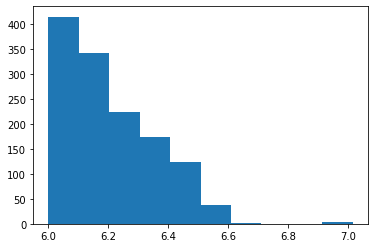

In [37]:
print('redshift distribution of TP:')
plt.hist(tp1['z'])

In [38]:
# false positive: the difference between tp and pred positive
fp1 = pd.merge(tp1, pred_qso1, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)

In [39]:
fp1 = fp1.drop(columns=['label_x', 'prob_1a_x', 'prob_1b_x', 'prob_1c_x', 'prob_1d_x', 'prob_1e_x', 'prob_1f_x', 'weighted prob_x', 'z'])
fp1.rename(columns={'label_y': 'label', 'prob_1a_y': 'prob_1a', 'prob_1b_y': 'prob_1b', 'prob_1c_y': 'prob_1c', 'prob_1d_y': 'prob_1d', 'prob_1e_y': 'prob_1e', 'prob_1f_y': 'prob_1f'}, inplace=True)
fp1.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,spt,label,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob_y
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,0.0,115.0,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,26.819606,25.547410,24.479845,24.257535,24.408483,24.546487,NaN,0.0,0.914381,0.494983,0.850483,0.183575,0.753846,0.432441,0.605723
std,0.864461,0.337609,0.835091,0.941268,0.850392,0.687247,NaN,0.0,0.159402,0.452697,0.246114,0.325963,0.340324,0.406388,0.136616
min,24.875267,24.356169,22.301314,22.013013,22.478709,23.017399,NaN,0.0,0.307692,0.000000,0.000000,0.000000,0.000000,0.000000,0.500590
25%,26.060763,25.280155,23.983939,23.619384,23.844235,23.991135,NaN,0.0,0.923077,0.000000,0.791667,0.022222,0.653846,0.000000,0.504322
50%,26.984864,25.576071,24.486349,24.241635,24.311677,24.533020,NaN,0.0,1.000000,0.615385,1.000000,0.022222,0.923077,0.461538,0.541228
75%,27.315591,25.864229,25.191776,25.079243,25.166378,25.113903,NaN,0.0,1.000000,1.000000,1.000000,0.144444,1.000000,0.846154,0.662390
max,29.471977,25.993737,25.703831,25.682318,25.763911,25.865081,NaN,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996268


In [40]:
false_positive1 = fp1.merge(test0, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'])
false_positive1 = false_positive1.drop(columns=['z_LSST_magerr', 'label_y', 'spt_x'])
false_positive1 = false_positive1.rename(columns={'label_x': 'label', 'spt_y': 'spt'})
false_positive1.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob_y,z,spt
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,26.819606,25.547410,24.479845,24.257535,24.408483,24.546487,0.0,0.914381,0.494983,0.850483,0.183575,0.753846,0.432441,0.605723,0.432525,8.591304
std,0.864461,0.337609,0.835091,0.941268,0.850392,0.687247,0.0,0.159402,0.452697,0.246114,0.325963,0.340324,0.406388,0.136616,0.513310,10.174698
min,24.875267,24.356169,22.301314,22.013013,22.478709,23.017399,0.0,0.307692,0.000000,0.000000,0.000000,0.000000,0.000000,0.500590,0.000000,0.000000
25%,26.060763,25.280155,23.983939,23.619384,23.844235,23.991135,0.0,0.923077,0.000000,0.791667,0.022222,0.653846,0.000000,0.504322,0.000000,0.000000
50%,26.984864,25.576071,24.486349,24.241635,24.311677,24.533020,0.0,1.000000,0.615385,1.000000,0.022222,0.923077,0.461538,0.541228,0.000000,8.000000
75%,27.315591,25.864229,25.191776,25.079243,25.166378,25.113903,0.0,1.000000,1.000000,1.000000,0.144444,1.000000,0.846154,0.662390,1.033345,9.000000
max,29.471977,25.993737,25.703831,25.682318,25.763911,25.865081,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996268,1.054773,29.000000


FP spectral type distribution (galaxy spt=0):


(array([48.,  0., 30., 15.,  0.,  0.,  0.,  0.,  7., 15.]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <BarContainer object of 10 artists>)

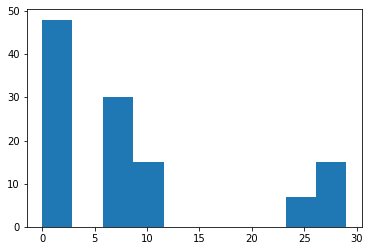

In [41]:
print('FP spectral type distribution (galaxy spt=0):')
plt.hist(false_positive1['spt'])

In [42]:
# false negative: the difference between all positive and true positive
fn1 = pd.merge(tp1, qso_test_26, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)
fn1 = fn1.drop(columns=['label_x', 'z_x', 'prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f', 'spt_y', 'spt_x'])
fn1 = fn1.rename(columns={'label_y': 'label', 'z_y':'z'})
fn1.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,weighted prob,z,label
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,0.0,25.000000,25.0
mean,28.075585,25.668547,25.344310,25.293630,25.110386,24.831364,NaN,6.104331,1.0
std,0.605109,0.314409,0.500096,0.597281,0.593836,0.674644,NaN,0.091218,0.0
min,27.258608,24.793714,24.320284,24.051799,23.872960,23.438350,NaN,6.005746,1.0
25%,27.704961,25.613825,25.172070,24.970429,24.816117,24.476747,NaN,6.040593,1.0
50%,27.890372,25.740404,25.451483,25.354616,25.180654,24.856248,NaN,6.083554,1.0
75%,28.387254,25.882841,25.695030,25.735381,25.536668,25.231513,NaN,6.162137,1.0
max,29.497419,25.983484,26.039565,26.122272,25.983855,25.816810,NaN,6.355559,1.0


redshift distribution of FN:


(array([7., 4., 6., 1., 2., 3., 0., 0., 1., 1.]),
 array([6.0057456 , 6.04072691, 6.07570822, 6.11068953, 6.14567085,
        6.18065216, 6.21563347, 6.25061479, 6.2855961 , 6.32057741,
        6.35555873]),
 <BarContainer object of 10 artists>)

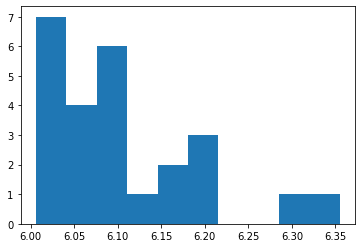

In [43]:
print('redshift distribution of FN:')
plt.hist(fn1['z'])

In [44]:
print('w snr constraints, probability prediction results:\n')
print('precision:', round(tp1.shape[0]/(tp1.shape[0]+fp1.shape[0]), 4))
print('recall:', round(tp1.shape[0]/(tp1.shape[0]+fn1.shape[0]), 4))

w snr constraints, probability prediction results:

precision: 0.9198
recall: 0.9814


bins: [6.00042939 6.05116956 6.10190974 6.15264991 6.20339008 6.25413025
 6.30487043 6.3556106  6.40635077 6.45709094 6.50783111 6.55857129
 6.60931146 6.66005163 6.7107918  6.76153198 6.81227215 6.86301232
 6.91375249 6.96449266 7.01523284]
test qso: #/bin: [211. 219. 188. 159. 135.  91. 103.  72.  69.  54.  18.  20.   2.   0.
   0.   0.   0.   0.   1.   2.]
test qso: #/bin: [201. 213. 186. 156. 133.  90. 102.  72.  69.  54.  18.  20.   2.   0.
   0.   0.   0.   0.   1.   2.]


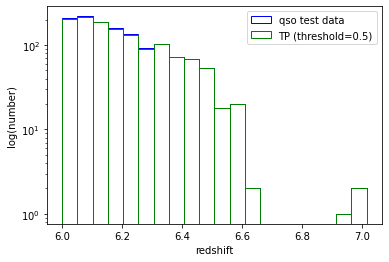

<ipython-input-45-95b873492508>:12: RuntimeWarning: invalid value encountered in true_divide
  ratio = hist21/hist11


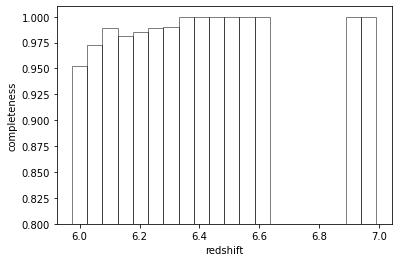

In [45]:
hist11, bins11, _ = plt.hist(qso_test_26['z'], bins=20, fill=False, label='qso test data', edgecolor='blue')
hist21, bins21, _ = plt.hist(tp1['z'], bins=20, fill=False, label='TP (threshold=0.5)', edgecolor='green')
print('bins:', bins11)
print('test qso: #/bin:', hist11)
print('test qso: #/bin:', hist21)
plt.xlabel('redshift')
plt.ylabel('log(number)')
plt.yscale('log')
plt.legend()
plt.show()

ratio = hist21/hist11
plt.bar(bins11[:-1], ratio, width=(bins11[1] - bins11[0]), alpha=0.5, label='Density Ratios', fill=False)
plt.ylim(0.8, 1.01)
plt.xlabel('redshift')
plt.ylabel('completeness')
plt.show()

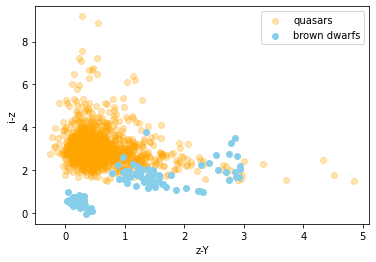

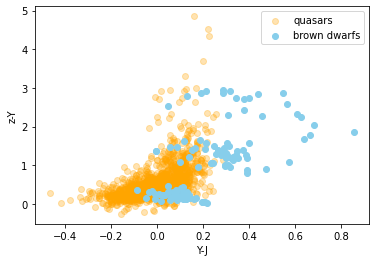

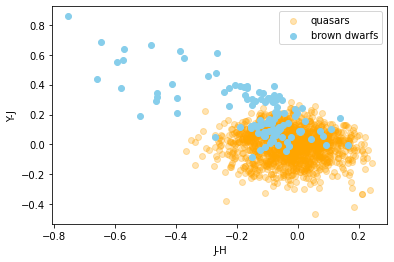

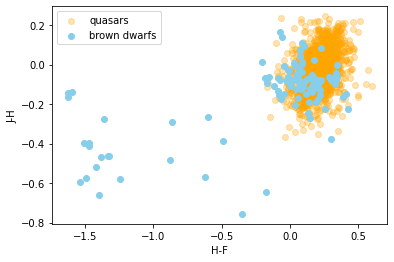

In [46]:
# i-z vs z-Y
plt.scatter(tp1['z_LSST_mag']-tp1['Y_WFI_mag'], tp1['i_LSST_mag']-tp1['z_LSST_mag'], alpha=0.3, label='quasars', color='orange')
plt.scatter(false_positive1['z_LSST_mag']-false_positive1['Y_WFI_mag'], false_positive1['i_LSST_mag']-false_positive1['z_LSST_mag'], label='brown dwarfs', color='skyblue')
plt.xlabel('z-Y')
plt.ylabel('i-z')
plt.legend()
plt.show()

# z-Y vs Y-J
plt.scatter(tp1['Y_WFI_mag']-tp1['J_WFI_mag'], tp1['z_LSST_mag']-tp1['Y_WFI_mag'], alpha=0.3, label='quasars', color='orange')
plt.scatter(false_positive1['Y_WFI_mag']-false_positive1['J_WFI_mag'], false_positive1['z_LSST_mag']-false_positive1['Y_WFI_mag'], label='brown dwarfs', color='skyblue')
plt.xlabel('Y-J')
plt.ylabel('z-Y')
plt.legend()
plt.show()

# Y-J vs J-H
plt.scatter(tp1['J_WFI_mag']-tp1['H_WFI_mag'], tp1['Y_WFI_mag']-tp1['J_WFI_mag'], alpha=0.3, label='quasars', color='orange')
plt.scatter(false_positive1['J_WFI_mag']-false_positive1['H_WFI_mag'], false_positive1['Y_WFI_mag']-false_positive1['J_WFI_mag'], label='brown dwarfs', color='skyblue')
plt.xlabel('J-H')
plt.ylabel('Y-J')
plt.legend()
plt.show()

# J-H vs H-F
plt.scatter(tp1['H_WFI_mag']-tp1['F_WFI_mag'], tp1['J_WFI_mag']-tp1['H_WFI_mag'], alpha=0.3, label='quasars', color='orange')
plt.scatter(false_positive1['H_WFI_mag']-false_positive1['F_WFI_mag'], false_positive1['J_WFI_mag']-false_positive1['H_WFI_mag'], label='brown dwarfs', color='skyblue')
plt.xlabel('H-F')
plt.ylabel('J-H')
plt.legend()
plt.show()

### Use weighted_prob = 0.6 as the threshold

In [47]:
pred_qso2 = test_copy[test_copy['weighted prob'] > 0.6]
pred_qso2.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,28.075865,25.064678,24.451813,24.445589,24.481658,24.298395,0.967862,0.973209,0.988272,0.860198,0.827404,0.936041,0.742584,0.889965
std,0.938256,0.557467,0.704412,0.756073,0.738873,0.720846,0.176431,0.089593,0.054164,0.193715,0.304197,0.123212,0.280130,0.096114
min,26.721256,24.000488,20.452226,20.223916,20.227606,20.164541,0.000000,0.076923,0.307692,0.000000,0.000000,0.000000,0.000000,0.602011
25%,27.418854,24.597386,23.993636,23.963625,23.986850,23.833388,1.000000,1.000000,1.000000,0.805556,0.844444,0.923077,0.538462,0.832348
50%,27.889798,25.085878,24.461152,24.455810,24.496791,24.295843,1.000000,1.000000,1.000000,0.944444,0.977778,0.961538,0.846154,0.917927
75%,28.478181,25.545870,24.965667,24.990262,25.002136,24.811185,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.970141
max,34.283547,25.999147,26.175825,26.290053,26.334833,26.129822,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
tp2 = pred_qso2.merge(qso_test_26)
tp2.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob,z,spt
count,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.0,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.0
mean,28.093988,25.047291,24.475371,24.479565,24.508696,24.303829,1.0,0.974755,0.990496,0.861583,0.840772,0.948084,0.740333,0.894714,6.205393,0.0
std,0.941625,0.555112,0.693511,0.734481,0.728786,0.726659,0.0,0.088363,0.045071,0.191620,0.289918,0.084815,0.282111,0.091162,0.151760,0.0
min,26.721256,24.000488,20.452226,20.223916,20.227606,20.164541,1.0,0.076923,0.307692,0.027778,0.000000,0.346154,0.000000,0.602011,6.000429,0.0
25%,27.440970,24.568447,24.012575,23.994941,24.035840,23.830324,1.0,1.000000,1.000000,0.805556,0.866667,0.923077,0.538462,0.837946,6.080389,0.0
50%,27.901415,25.056429,24.485248,24.475123,24.515716,24.305445,1.0,1.000000,1.000000,0.944444,1.000000,0.961538,0.846154,0.921333,6.173278,0.0
75%,28.497747,25.534728,24.983137,25.005092,25.016855,24.818380,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.970914,6.310676,0.0
max,34.283547,25.999147,26.175825,26.290053,26.334833,26.129822,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.015233,0.0


redshift distribution of TP:


(array([403., 337., 221., 174., 117.,  38.,   2.,   0.,   0.,   3.]),
 array([6.00042939, 6.10190974, 6.20339008, 6.30487043, 6.40635077,
        6.50783111, 6.60931146, 6.7107918 , 6.81227215, 6.91375249,
        7.01523284]),
 <BarContainer object of 10 artists>)

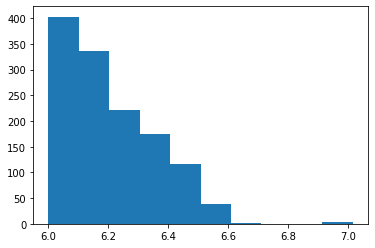

In [49]:
print('redshift distribution of TP:')
plt.hist(tp2['z'])

In [50]:
# false positive: the difference between tp and pred positive
fp2 = pd.merge(tp2, pred_qso2, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)

In [51]:
fp2 = fp2.drop(columns=['label_x', 'prob_1a_x', 'prob_1b_x', 'prob_1c_x', 'prob_1d_x', 'prob_1e_x', 'prob_1f_x', 'weighted prob_x', 'z'])
fp2.rename(columns={'label_y': 'label', 'prob_1a_y': 'prob_1a', 'prob_1b_y': 'prob_1b', 'prob_1c_y': 'prob_1c', 'prob_1d_y': 'prob_1d', 'prob_1e_y': 'prob_1e', 'prob_1f_y': 'prob_1f'}, inplace=True)
fp2.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,spt,label,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob_y
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,0.0,43.0,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,27.530052,25.588322,23.742327,23.422366,23.667388,24.134748,NaN,0.0,0.926655,0.921288,0.818475,0.424806,0.573345,0.810376,0.746939
std,0.625298,0.329936,0.667114,0.685073,0.560058,0.494355,NaN,0.0,0.112546,0.161432,0.247886,0.429708,0.349980,0.202895,0.128033
min,26.918964,24.928438,22.301314,22.013013,22.478709,23.017399,NaN,0.0,0.538462,0.307692,0.000000,0.000000,0.000000,0.384615,0.602885
25%,27.070379,25.260235,23.234980,22.796906,23.316871,23.860934,NaN,0.0,0.923077,0.923077,0.805556,0.022222,0.288462,0.634615,0.642565
50%,27.295868,25.576071,23.754032,23.440911,23.617195,24.043261,NaN,0.0,1.000000,1.000000,0.916667,0.222222,0.692308,0.884615,0.692072
75%,27.791067,25.912845,24.176748,23.982165,24.010200,24.523552,NaN,0.0,1.000000,1.000000,0.972222,0.988889,0.846154,1.000000,0.856824
max,29.471977,25.993435,24.884579,24.449146,24.678404,25.154299,NaN,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996268


In [52]:
false_positive2 = fp2.merge(test0, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'])
false_positive2 = false_positive2.drop(columns=['z_LSST_magerr', 'label_y', 'spt_x'])
false_positive2 = false_positive2.rename(columns={'label_x': 'label', 'spt_y': 'spt'})
false_positive2.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob_y,z,spt
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.0,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.0,43.000000
mean,27.530052,25.588322,23.742327,23.422366,23.667388,24.134748,0.0,0.926655,0.921288,0.818475,0.424806,0.573345,0.810376,0.746939,0.0,17.162791
std,0.625298,0.329936,0.667114,0.685073,0.560058,0.494355,0.0,0.112546,0.161432,0.247886,0.429708,0.349980,0.202895,0.128033,0.0,10.052079
min,26.918964,24.928438,22.301314,22.013013,22.478709,23.017399,0.0,0.538462,0.307692,0.000000,0.000000,0.000000,0.384615,0.602885,0.0,7.000000
25%,27.070379,25.260235,23.234980,22.796906,23.316871,23.860934,0.0,0.923077,0.923077,0.805556,0.022222,0.288462,0.634615,0.642565,0.0,8.000000
50%,27.295868,25.576071,23.754032,23.440911,23.617195,24.043261,0.0,1.000000,1.000000,0.916667,0.222222,0.692308,0.884615,0.692072,0.0,9.000000
75%,27.791067,25.912845,24.176748,23.982165,24.010200,24.523552,0.0,1.000000,1.000000,0.972222,0.988889,0.846154,1.000000,0.856824,0.0,29.000000
max,29.471977,25.993435,24.884579,24.449146,24.678404,25.154299,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996268,0.0,29.000000


FP spectral type distribution (galaxy spt=0):


(array([23.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.]),
 array([ 7. ,  9.2, 11.4, 13.6, 15.8, 18. , 20.2, 22.4, 24.6, 26.8, 29. ]),
 <BarContainer object of 10 artists>)

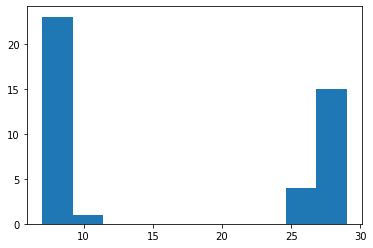

In [53]:
print('FP spectral type distribution (galaxy spt=0):')
plt.hist(false_positive2['spt'])

In [54]:
# false negative: the difference between all positive and true positive
fn2 = pd.merge(tp2, qso_test_26, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)
fn2 = fn2.drop(columns=['label_x', 'z_x', 'prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f', 'spt_y', 'spt_x'])
fn2 = fn2.rename(columns={'label_y': 'label', 'z_y':'z'})
fn2.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,weighted prob,z,label
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,0.0,49.000000,49.0
mean,28.004826,25.551462,25.073053,25.028047,24.876075,24.616199,NaN,6.144948,1.0
std,0.621209,0.397767,0.742830,0.836734,0.805974,0.847636,NaN,0.144007,0.0
min,26.940398,24.367056,23.436911,23.182668,23.165522,22.895464,NaN,6.005746,1.0
25%,27.575057,25.307017,24.703618,24.670896,24.502472,24.229848,NaN,6.041358,1.0
50%,27.807924,25.702114,25.329895,25.223653,25.047401,24.737234,NaN,6.095037,1.0
75%,28.337017,25.850950,25.596049,25.609011,25.428636,25.205967,NaN,6.191431,1.0
max,29.606871,25.983484,26.039565,26.122272,26.025973,25.893258,NaN,6.497115,1.0


redshift distribution of FN:


(array([17., 10.,  5.,  5.,  4.,  1.,  0.,  1.,  2.,  4.]),
 array([6.0057456 , 6.05488256, 6.10401952, 6.15315648, 6.20229345,
        6.25143041, 6.30056737, 6.34970433, 6.3988413 , 6.44797826,
        6.49711522]),
 <BarContainer object of 10 artists>)

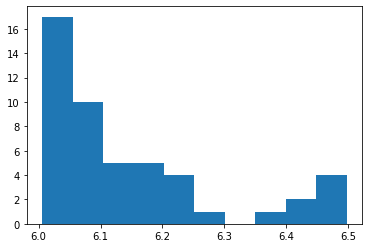

In [55]:
print('redshift distribution of FN:')
plt.hist(fn2['z'])

In [56]:
print('w snr constraints, probability prediction results:\n')
print('precision:', round(tp2.shape[0]/(tp2.shape[0]+fp2.shape[0]), 4))
print('recall:', round(tp2.shape[0]/(tp2.shape[0]+fn2.shape[0]), 4))

w snr constraints, probability prediction results:

precision: 0.9679
recall: 0.9635


bins: [6.00042939 6.05116956 6.10190974 6.15264991 6.20339008 6.25413025
 6.30487043 6.3556106  6.40635077 6.45709094 6.50783111 6.55857129
 6.60931146 6.66005163 6.7107918  6.76153198 6.81227215 6.86301232
 6.91375249 6.96449266 7.01523284]
test qso: #/bin: [211. 219. 188. 159. 135.  91. 103.  72.  69.  54.  18.  20.   2.   0.
   0.   0.   0.   0.   1.   2.]
test qso: #/bin: [194. 209. 183. 154. 131.  90. 102.  72.  67.  50.  18.  20.   2.   0.
   0.   0.   0.   0.   1.   2.]


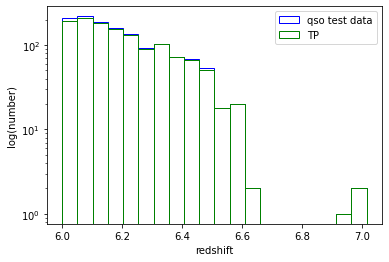

<ipython-input-57-8ebad10baa03>:12: RuntimeWarning: invalid value encountered in true_divide
  ratio2 = hist22/hist12


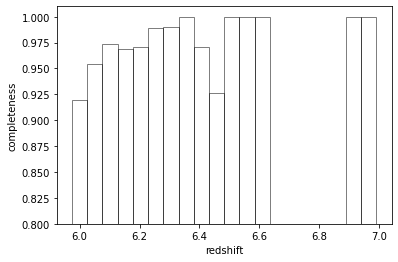

In [57]:
hist12, bins12, _ = plt.hist(qso_test_26['z'], bins=20, fill=False, label='qso test data', edgecolor='blue')
hist22, bins22, _ = plt.hist(tp2['z'], bins=20, fill=False, label='TP', edgecolor='green')
print('bins:', bins12)
print('test qso: #/bin:', hist12)
print('test qso: #/bin:', hist22)
plt.xlabel('redshift')
plt.ylabel('log(number)')
plt.yscale('log')
plt.legend()
plt.show()

ratio2 = hist22/hist12
plt.bar(bins12[:-1], ratio2, width=(bins12[1] - bins12[0]), alpha=0.5, label='Density Ratios', fill=False)
plt.ylim(0.8, 1.01)
plt.xlabel('redshift')
plt.ylabel('completeness')
plt.show()

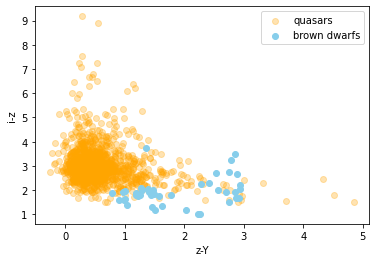

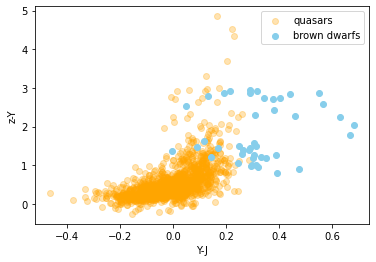

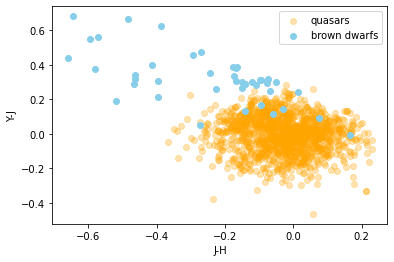

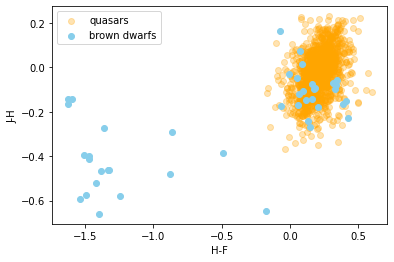

In [58]:
# i-z vs z-Y
plt.scatter(tp2['z_LSST_mag']-tp2['Y_WFI_mag'], tp2['i_LSST_mag']-tp2['z_LSST_mag'], alpha=0.3, label='quasars', color='orange')
plt.scatter(false_positive2['z_LSST_mag']-false_positive2['Y_WFI_mag'], false_positive2['i_LSST_mag']-false_positive2['z_LSST_mag'], label='brown dwarfs', color='skyblue')
plt.xlabel('z-Y')
plt.ylabel('i-z')
plt.legend()
plt.show()

# z-Y vs Y-J
plt.scatter(tp2['Y_WFI_mag']-tp2['J_WFI_mag'], tp2['z_LSST_mag']-tp2['Y_WFI_mag'], alpha=0.3, label='quasars', color='orange')
plt.scatter(false_positive2['Y_WFI_mag']-false_positive2['J_WFI_mag'], false_positive2['z_LSST_mag']-false_positive2['Y_WFI_mag'], label='brown dwarfs', color='skyblue')
plt.xlabel('Y-J')
plt.ylabel('z-Y')
plt.legend()
plt.show()

# Y-J vs J-H
plt.scatter(tp2['J_WFI_mag']-tp2['H_WFI_mag'], tp2['Y_WFI_mag']-tp2['J_WFI_mag'], alpha=0.3, label='quasars', color='orange')
plt.scatter(false_positive2['J_WFI_mag']-false_positive2['H_WFI_mag'], false_positive2['Y_WFI_mag']-false_positive2['J_WFI_mag'], label='brown dwarfs', color='skyblue')
plt.xlabel('J-H')
plt.ylabel('Y-J')
plt.legend()
plt.show()

# J-H vs H-F
plt.scatter(tp2['H_WFI_mag']-tp2['F_WFI_mag'], tp2['J_WFI_mag']-tp2['H_WFI_mag'], alpha=0.3, label='quasars', color='orange')
plt.scatter(false_positive2['H_WFI_mag']-false_positive2['F_WFI_mag'], false_positive2['J_WFI_mag']-false_positive2['H_WFI_mag'], label='brown dwarfs', color='skyblue')
plt.xlabel('H-F')
plt.ylabel('J-H')
plt.legend()
plt.show()

### Use weighted_prob = 0.7 as the threshold

In [59]:
pred_qso3 = test_copy[test_copy['weighted prob'] > 0.7]
pred_qso3.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000
mean,28.087817,25.045626,24.446036,24.446503,24.487472,24.305597,0.984873,0.984811,0.993876,0.884996,0.845471,0.951249,0.760442,0.905375
std,0.943133,0.554672,0.700386,0.747241,0.733730,0.716924,0.122108,0.054890,0.032933,0.156699,0.285059,0.090328,0.265941,0.076836
min,26.721256,24.000488,20.452226,20.223916,20.227606,20.164541,0.000000,0.153846,0.538462,0.083333,0.000000,0.000000,0.000000,0.701243
25%,27.431039,24.565826,23.992798,23.977907,24.008136,23.835294,1.000000,1.000000,1.000000,0.861111,0.888889,0.923077,0.576923,0.847117
50%,27.897597,25.056355,24.455790,24.459214,24.502625,24.306662,1.000000,1.000000,1.000000,0.944444,1.000000,0.961538,0.884615,0.925634
75%,28.476029,25.526150,24.963363,24.984707,25.005804,24.810781,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.972626
max,34.283547,25.999147,26.083287,26.290053,26.334833,26.129822,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
tp3 = pred_qso3.merge(qso_test_26)
tp3.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob,z,spt
count,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.0,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.0
mean,28.091304,25.036412,24.464878,24.470049,24.506147,24.304634,1.0,0.984702,0.993781,0.883971,0.846528,0.957341,0.757509,0.905887,6.207991,0.0
std,0.946525,0.552403,0.685386,0.724517,0.721043,0.719509,0.0,0.055226,0.033177,0.157568,0.282916,0.064706,0.266568,0.076624,0.150739,0.0
min,26.721256,24.000488,20.452226,20.223916,20.227606,20.164541,1.0,0.153846,0.538462,0.083333,0.000000,0.461538,0.000000,0.701243,6.000429,0.0
25%,27.431626,24.560569,24.012107,23.995192,24.036329,23.834790,1.0,1.000000,1.000000,0.833333,0.888889,0.923077,0.576923,0.848323,6.083491,0.0
50%,27.898371,25.040443,24.473392,24.471435,24.515018,24.301137,1.0,1.000000,1.000000,0.944444,1.000000,0.961538,0.884615,0.926623,6.178406,0.0
75%,28.482161,25.516467,24.966078,24.991083,25.011208,24.811388,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.973122,6.311230,0.0
max,34.283547,25.999147,26.083287,26.290053,26.334833,26.129822,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.015233,0.0


redshift distribution of TP:


(array([370., 324., 221., 171., 109.,  37.,   2.,   0.,   0.,   3.]),
 array([6.00042939, 6.10190974, 6.20339008, 6.30487043, 6.40635077,
        6.50783111, 6.60931146, 6.7107918 , 6.81227215, 6.91375249,
        7.01523284]),
 <BarContainer object of 10 artists>)

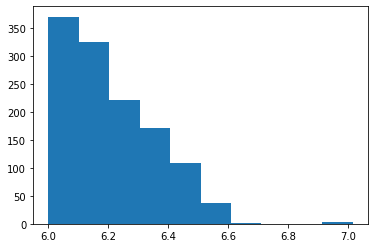

In [61]:
print('redshift distribution of TP:')
plt.hist(tp3['z'])

In [62]:
# false positive: the difference between tp and pred positive
fp3 = pd.merge(tp3, pred_qso3, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)

In [63]:
fp3 = fp3.drop(columns=['label_x', 'prob_1a_x', 'prob_1b_x', 'prob_1c_x', 'prob_1d_x', 'prob_1e_x', 'prob_1f_x', 'weighted prob_x', 'z'])
fp3.rename(columns={'label_y': 'label', 'prob_1a_y': 'prob_1a', 'prob_1b_y': 'prob_1b', 'prob_1c_y': 'prob_1c', 'prob_1d_y': 'prob_1d', 'prob_1e_y': 'prob_1e', 'prob_1f_y': 'prob_1f'}, inplace=True)
fp3.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,spt,label,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob_y
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,0.0,19.0,19.000000,19.0,19.000000,19.000000,19.000000,19.000000,19.000000
mean,27.860805,25.645539,23.219344,22.913572,23.271648,24.368310,NaN,0.0,0.991903,1.0,0.951754,0.776608,0.554656,0.951417,0.872021
std,0.665964,0.334024,0.576546,0.606146,0.501232,0.532275,NaN,0.0,0.024254,0.0,0.048857,0.405347,0.335867,0.112384,0.085317
min,26.925604,24.928438,22.301314,22.013013,22.478709,23.017399,NaN,0.0,0.923077,1.0,0.833333,0.000000,0.000000,0.615385,0.732761
25%,27.310485,25.379550,22.818121,22.522107,22.940971,24.103684,NaN,0.0,1.000000,1.0,0.916667,0.866667,0.307692,1.000000,0.825628
50%,27.823154,25.755094,23.112074,22.753643,23.215637,24.514083,NaN,0.0,1.000000,1.0,0.944444,1.000000,0.653846,1.000000,0.880657
75%,28.180948,25.915727,23.520079,23.279832,23.508553,24.676112,NaN,0.0,1.000000,1.0,1.000000,1.000000,0.826923,1.000000,0.944710
max,29.471977,25.988254,24.747961,24.447401,24.596418,25.154299,NaN,0.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.996268


In [64]:
false_positive3 = fp3.merge(test0, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'])
false_positive3 = false_positive3.drop(columns=['z_LSST_magerr', 'label_y', 'spt_x'])
false_positive3 = false_positive3.rename(columns={'label_x': 'label', 'spt_y': 'spt'})
false_positive3.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob_y,z,spt
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0,19.000000,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.0,19.000000
mean,27.860805,25.645539,23.219344,22.913572,23.271648,24.368310,0.0,0.991903,1.0,0.951754,0.776608,0.554656,0.951417,0.872021,0.0,24.736842
std,0.665964,0.334024,0.576546,0.606146,0.501232,0.532275,0.0,0.024254,0.0,0.048857,0.405347,0.335867,0.112384,0.085317,0.0,8.484248
min,26.925604,24.928438,22.301314,22.013013,22.478709,23.017399,0.0,0.923077,1.0,0.833333,0.000000,0.000000,0.615385,0.732761,0.0,8.000000
25%,27.310485,25.379550,22.818121,22.522107,22.940971,24.103684,0.0,1.000000,1.0,0.916667,0.866667,0.307692,1.000000,0.825628,0.0,29.000000
50%,27.823154,25.755094,23.112074,22.753643,23.215637,24.514083,0.0,1.000000,1.0,0.944444,1.000000,0.653846,1.000000,0.880657,0.0,29.000000
75%,28.180948,25.915727,23.520079,23.279832,23.508553,24.676112,0.0,1.000000,1.0,1.000000,1.000000,0.826923,1.000000,0.944710,0.0,29.000000
max,29.471977,25.988254,24.747961,24.447401,24.596418,25.154299,0.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.996268,0.0,29.000000


FP spectral type distribution (galaxy spt=0):


(array([ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

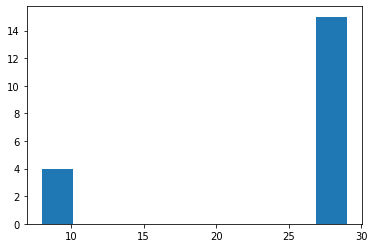

In [65]:
print('FP spectral type distribution (galaxy spt=0):')
plt.hist(false_positive3['spt'])

In [66]:
# false negative: the difference between all positive and true positive
fn3 = pd.merge(tp3, qso_test_26, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)
fn3 = fn3.drop(columns=['label_x', 'z_x', 'prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f', 'spt_y', 'spt_x'])
fn3 = fn3.rename(columns={'label_y': 'label', 'z_y':'z'})
fn3.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,weighted prob,z,label
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,0.0,107.000000,107.0
mean,28.084190,25.403944,24.870386,24.840748,24.706409,24.437573,NaN,6.147667,1.0
std,0.745330,0.512797,0.806237,0.887725,0.859375,0.872864,NaN,0.154401,0.0
min,26.940398,24.057999,22.312847,22.054529,21.997793,21.742369,NaN,6.001783,1.0
25%,27.570535,25.042553,24.318677,24.231178,24.146492,23.838295,NaN,6.041246,1.0
50%,27.864024,25.605707,25.113588,25.039617,24.896443,24.610870,NaN,6.089559,1.0
75%,28.548736,25.796210,25.514110,25.522457,25.392406,25.097665,NaN,6.176217,1.0
max,30.882518,25.983484,26.175825,26.229560,26.199572,25.893258,NaN,6.559240,1.0


redshift distribution of FN:


(array([35., 32., 11.,  9.,  0.,  2.,  3.,  4.,  9.,  2.]),
 array([6.00178306, 6.05752876, 6.11327446, 6.16902016, 6.22476586,
        6.28051156, 6.33625726, 6.39200297, 6.44774867, 6.50349437,
        6.55924007]),
 <BarContainer object of 10 artists>)

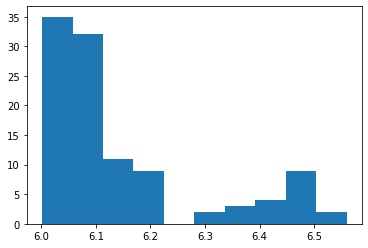

In [67]:
print('redshift distribution of FN:')
plt.hist(fn3['z'])

In [68]:
print('w snr constraints, probability prediction results:\n')
print('precision:', round(tp3.shape[0]/(tp3.shape[0]+fp3.shape[0]), 4))
print('recall:', round(tp3.shape[0]/(tp3.shape[0]+fn3.shape[0]), 4))

w snr constraints, probability prediction results:

precision: 0.9849
recall: 0.9204


bins: [6.00042939 6.05116956 6.10190974 6.15264991 6.20339008 6.25413025
 6.30487043 6.3556106  6.40635077 6.45709094 6.50783111 6.55857129
 6.60931146 6.66005163 6.7107918  6.76153198 6.81227215 6.86301232
 6.91375249 6.96449266 7.01523284]
test qso: #/bin: [211. 219. 188. 159. 135.  91. 103.  72.  69.  54.  18.  20.   2.   0.
   0.   0.   0.   0.   1.   2.]
test qso: #/bin: [176. 194. 172. 152. 131.  90. 101.  70.  65.  44.  18.  19.   2.   0.
   0.   0.   0.   0.   1.   2.]


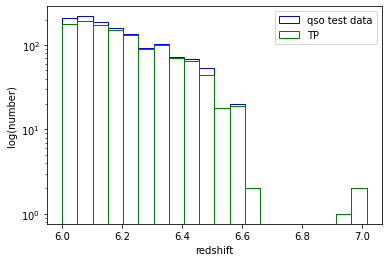

<ipython-input-69-92ddbcf70366>:12: RuntimeWarning: invalid value encountered in true_divide
  ratio3 = hist23/hist13


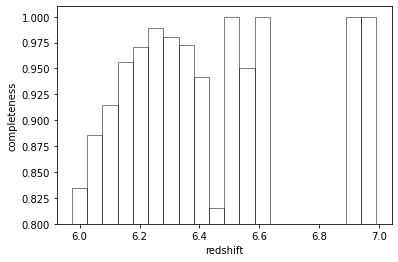

In [69]:
hist13, bins13, _ = plt.hist(qso_test_26['z'], bins=20, fill=False, label='qso test data', edgecolor='blue')
hist23, bins23, _ = plt.hist(tp3['z'], bins=20, fill=False, label='TP', edgecolor='green')
print('bins:', bins13)
print('test qso: #/bin:', hist13)
print('test qso: #/bin:', hist23)
plt.xlabel('redshift')
plt.ylabel('log(number)')
plt.yscale('log')
plt.legend()
plt.show()

ratio3 = hist23/hist13
plt.bar(bins13[:-1], ratio3, width=(bins13[1] - bins13[0]), alpha=0.5, label='Density Ratios', fill=False)
plt.ylim(0.8, 1.01)
plt.xlabel('redshift')
plt.ylabel('completeness')
plt.show()

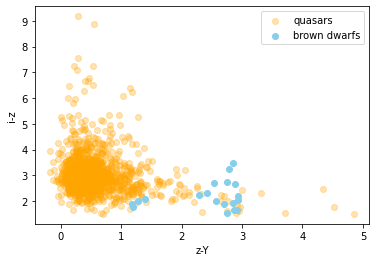

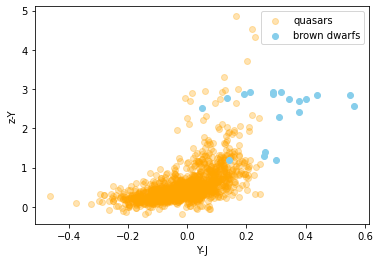

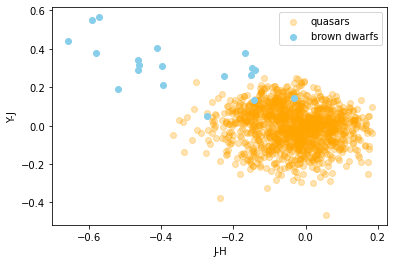

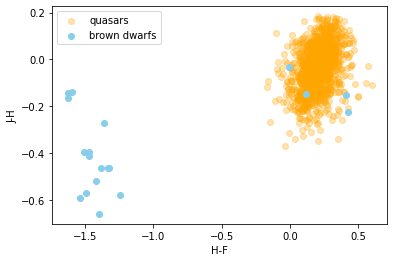

In [70]:
# i-z vs z-Y
plt.scatter(tp3['z_LSST_mag']-tp3['Y_WFI_mag'], tp3['i_LSST_mag']-tp3['z_LSST_mag'], alpha=0.3, label='quasars', color='orange')
plt.scatter(false_positive3['z_LSST_mag']-false_positive3['Y_WFI_mag'], false_positive3['i_LSST_mag']-false_positive3['z_LSST_mag'], label='brown dwarfs', color='skyblue')
plt.xlabel('z-Y')
plt.ylabel('i-z')
plt.legend()
plt.show()

# z-Y vs Y-J
plt.scatter(tp3['Y_WFI_mag']-tp3['J_WFI_mag'], tp3['z_LSST_mag']-tp3['Y_WFI_mag'], alpha=0.3, label='quasars', color='orange')
plt.scatter(false_positive3['Y_WFI_mag']-false_positive3['J_WFI_mag'], false_positive3['z_LSST_mag']-false_positive3['Y_WFI_mag'], label='brown dwarfs', color='skyblue')
plt.xlabel('Y-J')
plt.ylabel('z-Y')
plt.legend()
plt.show()

# Y-J vs J-H
plt.scatter(tp3['J_WFI_mag']-tp3['H_WFI_mag'], tp3['Y_WFI_mag']-tp3['J_WFI_mag'], alpha=0.3, label='quasars', color='orange')
plt.scatter(false_positive3['J_WFI_mag']-false_positive3['H_WFI_mag'], false_positive3['Y_WFI_mag']-false_positive3['J_WFI_mag'], label='brown dwarfs', color='skyblue')
plt.xlabel('J-H')
plt.ylabel('Y-J')
plt.legend()
plt.show()

# J-H vs H-F
plt.scatter(tp3['H_WFI_mag']-tp3['F_WFI_mag'], tp3['J_WFI_mag']-tp3['H_WFI_mag'], alpha=0.3, label='quasars', color='orange')
plt.scatter(false_positive3['H_WFI_mag']-false_positive3['F_WFI_mag'], false_positive3['J_WFI_mag']-false_positive3['H_WFI_mag'], label='brown dwarfs', color='skyblue')
plt.xlabel('H-F')
plt.ylabel('J-H')
plt.legend()
plt.show()

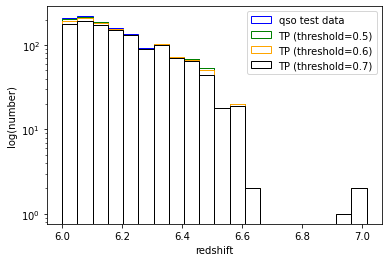

<ipython-input-71-1f542f6583ea>:11: RuntimeWarning: invalid value encountered in true_divide
  ratio1 = hist21/hist11
<ipython-input-71-1f542f6583ea>:12: RuntimeWarning: invalid value encountered in true_divide
  ratio2 = hist22/hist12
<ipython-input-71-1f542f6583ea>:13: RuntimeWarning: invalid value encountered in true_divide
  ratio3 = hist23/hist13


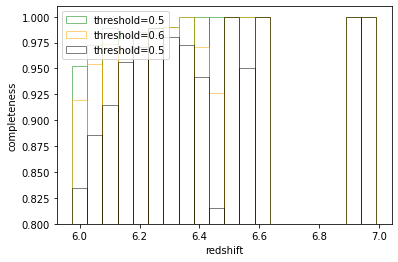

In [71]:
hist12, bins12, _ = plt.hist(qso_test_26['z'], bins=20, fill=False, label='qso test data', edgecolor='blue')
hist21, bins21, _ = plt.hist(tp1['z'], bins=20, fill=False, label='TP (threshold=0.5)', edgecolor='green')
hist22, bins22, _ = plt.hist(tp2['z'], bins=20, fill=False, label='TP (threshold=0.6)', edgecolor='orange')
hist23, bins23, _ = plt.hist(tp3['z'], bins=20, fill=False, label='TP (threshold=0.7)', edgecolor='black')
plt.xlabel('redshift')
plt.ylabel('log(number)')
plt.yscale('log')
plt.legend()
plt.show()

ratio1 = hist21/hist11
ratio2 = hist22/hist12
ratio3 = hist23/hist13
plt.bar(bins12[:-1], ratio1, width=(bins12[1] - bins12[0]), alpha=0.5, label='threshold=0.5', fill=False, edgecolor='green')
plt.bar(bins12[:-1], ratio2, width=(bins12[1] - bins12[0]), alpha=0.5, label='threshold=0.6', fill=False, edgecolor='orange')
plt.bar(bins12[:-1], ratio3, width=(bins12[1] - bins12[0]), alpha=0.5, label='threshold=0.5', fill=False, edgecolor='black')
plt.ylim(0.8, 1.01)
plt.xlabel('redshift')
plt.ylabel('completeness')
plt.legend()
plt.show()

In [185]:
print(bins12)

[6.00042939 6.05116956 6.10190974 6.15264991 6.20339008 6.25413025
 6.30487043 6.3556106  6.40635077 6.45709094 6.50783111 6.55857129
 6.60931146 6.66005163 6.7107918  6.76153198 6.81227215 6.86301232
 6.91375249 6.96449266 7.01523284]


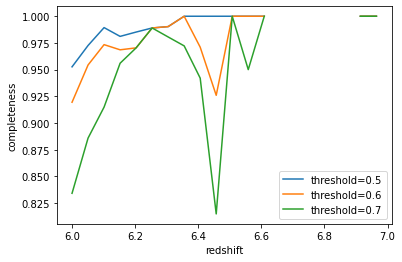

In [72]:
plt.plot(bins12[:-1], ratio1, label='threshold=0.5')
plt.plot(bins12[:-1], ratio2, label='threshold=0.6')
plt.plot(bins12[:-1], ratio3, label='threshold=0.7')

plt.xlabel('redshift')
plt.ylabel('completeness')
plt.legend()
plt.show()

In [76]:
np.nanmean(ratio1)

0.9906793725819047

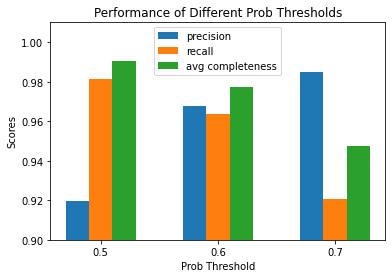

In [81]:
thresholds = [0.5, 0.6, 0.7]
precisions = [0.9198, 0.9679, 0.9849]
recalls = [0.9814, 0.9635, 0.9204]
com = [np.nanmean(ratio1), np.nanmean(ratio2), np.nanmean(ratio3)]

x = np.arange(len(thresholds))

# Set the width of the bars
width = 0.2

# Plot the grouped bar plot
plt.bar(x - width, precisions, width, label='precision')
plt.bar(x, recalls, width, label='recall')
plt.bar(x + width, com, width, label='avg completeness')

# Add labels, legend, and tick labels
plt.xlabel('Prob Threshold')
plt.ylabel('Scores')
plt.ylim(0.9, 1.01)
plt.title('Performance of Different Prob Thresholds')
plt.xticks(x, thresholds)
plt.legend()

# Show the plot
plt.show()

### Apply the filters to whole test catalog

In [37]:
test0c = test0.copy()
print(len(test_copy[test_copy['label'] == 1]))

1344


In [29]:
# x: z - J
# y: Y - H
testf_1a = [test0c['z_LSST_mag']-test0c['J_WFI_mag'], test0c['Y_WFI_mag']-test0c['H_WFI_mag']]

prob_1a = filter1a.predict_proba(np.array(testf_1a).transpose())

test0c['prob_1a'] = prob_1a[:, 1]

In [30]:
# x: Y - H 
# y: i - H

prob_1b = filter1b.predict_proba(np.array([test0c['Y_WFI_mag']-test0c['H_WFI_mag'], test0c['i_LSST_mag']-test0c['H_WFI_mag']]).transpose())

test0c['prob_1b'] = prob_1b[:, 1]

In [31]:
# x: z - H
# y: J - H

prob_1c = filter1c.predict_proba(np.array([test0c['z_LSST_mag']-test0c['H_WFI_mag'], test0c['J_WFI_mag']-test0c['H_WFI_mag']]).transpose())

test0c['prob_1c'] = prob_1c[:, 1]

In [32]:
# x: z - Y
# y: i - Y

prob_1d = filter1d.predict_proba(np.array([test0c['z_LSST_mag']-test0c['Y_WFI_mag'], test0c['i_LSST_mag']-test0c['Y_WFI_mag']]).transpose())

test0c['prob_1d'] = prob_1d[:, 1]

In [33]:
# x: Y - J
# y: J - H

prob_1e = filter1e.predict_proba(np.array([test0c['Y_WFI_mag']-test0c['J_WFI_mag'], test0c['J_WFI_mag']-test0c['H_WFI_mag']]).transpose())

test0c['prob_1e'] = prob_1e[:, 1]

In [34]:
# x: i - Y
# y: J - H

prob_1f = filter1f.predict_proba(np.array([test0c['i_LSST_mag']-test0c['Y_WFI_mag'], test0c['J_WFI_mag']-test0c['H_WFI_mag']]).transpose())

test0c['prob_1f'] = prob_1f[:, 1]

In [36]:
# use best scores as weights:
weights = [0.9882, 0.9938, 0.9463, 0.9678, 0.95, 0.9161]
probabilities = test0c[['prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f']]
cols = ['prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f']

wprob = np.zeros(len(probabilities['prob_1a']))
for i in range(len(weights)):
    sum_weights = sum(weights)
    wprob += weights[i]*probabilities[cols[i]]/sum_weights

print(wprob.shape)

(41184,)


In [38]:
test0c['weighted prob'] = wprob
test0c.head()

,z,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,spt,z_LSST_magerr,weighted prob
0,6.669676,30.246452,32.650390,24.245616,24.307675,24.446622,24.450786,1.0,0.0,NaN,1.000000
1,6.083415,34.465248,26.538113,26.958371,26.651371,27.003728,26.927044,1.0,0.0,NaN,0.746721
2,6.406638,27.532037,25.116377,24.159598,24.087764,24.303871,24.112669,1.0,0.0,NaN,0.860870
3,6.014952,29.244599,26.729309,26.512185,26.188512,26.356917,26.036399,1.0,0.0,NaN,0.851789
4,6.046875,27.858721,27.001626,30.095772,29.194047,29.298482,28.025738,1.0,0.0,NaN,0.004562


In [39]:
pred_qso = test0c[test0c['weighted prob'] > 0.6]
pred_qso.describe()

,z,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,spt,z_LSST_magerr,weighted prob
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,43.000000,2870.000000
mean,6.220107,28.689590,26.204087,25.022750,24.990021,25.089816,24.894772,0.981882,0.257143,0.135999,0.866423
std,0.871121,1.317841,1.568137,1.263028,1.310729,1.397391,1.345895,0.133403,2.414103,0.039812,0.109313
min,0.000000,26.618546,23.163809,20.452226,20.223916,20.227606,20.164541,0.000000,0.000000,0.072336,0.600193
25%,6.106629,27.729222,25.009971,24.101655,24.065118,24.132889,23.959535,1.000000,0.000000,0.100734,0.789939
50%,6.246557,28.446014,25.996147,24.945274,24.935249,24.980079,24.778762,1.000000,0.000000,0.138811,0.885703
75%,6.469322,29.336734,27.153733,25.912131,25.911948,25.979645,25.784315,1.000000,0.000000,0.173660,0.965778
max,8.409925,35.495708,34.077901,28.831809,29.663491,32.063108,31.012723,1.000000,29.000000,0.210918,1.000000


In [63]:
tp = pred_qso.merge(qso_test)
tp = tp.drop(columns=['z_LSST_magerr', 'spt', 'i_LSST_mag'])
tp.describe()

,z,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,weighted prob
count,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.0,2818.000000
mean,6.331586,26.209498,25.036879,25.008784,25.106295,24.901263,1.0,0.868703
std,0.289630,1.576735,1.258222,1.302414,1.394266,1.350510,0.0,0.107801
min,6.000191,23.163809,20.452226,20.223916,20.227606,20.164541,1.0,0.600193
25%,6.112077,24.993221,24.119847,24.093221,24.154156,23.963865,1.0,0.793458
50%,6.253116,26.016740,24.963460,24.955980,24.995783,24.803851,1.0,0.887372
75%,6.474969,27.173164,25.921013,25.914012,25.985767,25.790910,1.0,0.966415
max,8.409925,34.077901,28.831809,29.663491,32.063108,31.012723,1.0,1.000000


redshift distribution of TP:


(array([1.36e+03, 7.69e+02, 4.11e+02, 1.77e+02, 6.20e+01, 2.40e+01,
        8.00e+00, 4.00e+00, 1.00e+00, 2.00e+00]),
 array([6.00019102, 6.24116441, 6.48213779, 6.72311117, 6.96408456,
        7.20505794, 7.44603132, 7.68700471, 7.92797809, 8.16895148,
        8.40992486]),
 <BarContainer object of 10 artists>)

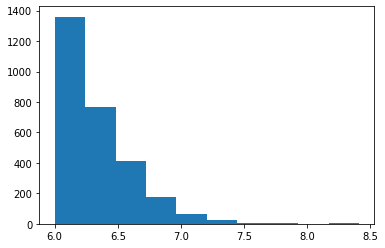

In [41]:
print('redshift distribution of TP:')
plt.hist(tp['z'])

In [54]:
# false positive: the difference between tp and pred positive
fp = pd.merge(tp, pred_qso, on=['z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)

In [55]:
fp = fp.drop(columns=['label_x', 'spt_x', 'z_LSST_magerr_x','z_LSST_magerr_y', 'weighted prob_x', 'z_x', 'i_LSST_mag_x', 'i_LSST_mag_y'])
fp.rename(columns={'label_y': 'label', 'spt_y': 'spt', 'weighted prob_y':'weighted_prob', 'z_y': 'z'}, inplace=True)
fp.describe()

,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,z,label,spt,weighted_prob
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.000000,52.000000
mean,25.910826,24.257105,23.973203,24.196819,24.542984,0.178783,0.0,14.192308,0.742875
std,0.961459,1.298850,1.370502,1.282527,1.015466,0.394657,0.0,11.233770,0.120293
min,24.928438,22.301314,22.013013,22.478709,23.017399,0.000000,0.0,0.000000,0.602885
25%,25.341315,23.468613,23.110849,23.407255,23.896647,0.000000,0.0,8.000000,0.647673
50%,25.772945,23.994884,23.690132,23.874240,24.279760,0.000000,0.0,9.000000,0.699542
75%,25.979794,24.628280,24.344847,24.458072,24.836339,0.000000,0.0,29.000000,0.828290
max,31.083271,27.468209,27.044083,27.308830,27.114811,1.054979,0.0,29.000000,0.996268


spectral type distribution of FP:


(array([ 9.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  4., 15.]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <BarContainer object of 10 artists>)

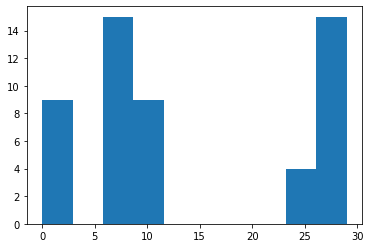

In [64]:
print('spectral type distribution of FP:')
plt.hist(fp['spt'])

In [58]:
# false negative: the difference between all positive and true positive
fn = pd.merge(tp, qso_test, on=['z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)
fn = fn.drop(columns=['z_x', 'i_LSST_mag_x', 'i_LSST_mag_y', 'z_LSST_magerr'])
fn = fn.rename(columns={'z_y':'z'})
fn.describe()

,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,spt,weighted prob,z
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,0.0,0.0,0.0,1452.000000
mean,27.942240,27.667012,27.639474,27.552425,27.323470,NaN,NaN,NaN,6.340440
std,1.222357,1.271626,1.304221,1.331677,1.305083,NaN,NaN,NaN,0.346483
min,23.905078,23.430767,23.182668,23.109581,22.716337,NaN,NaN,NaN,6.000528
25%,27.192716,26.879983,26.865556,26.739710,26.569169,NaN,NaN,NaN,6.092112
50%,27.794486,27.592571,27.520138,27.474337,27.257767,NaN,NaN,NaN,6.232329
75%,28.516276,28.328536,28.318534,28.204092,27.940275,NaN,NaN,NaN,6.453834
max,36.798806,35.672331,33.879891,34.514265,34.228085,NaN,NaN,NaN,8.482816


redshift distribution of FN:


(array([770., 362., 134.,  97.,  50.,  23.,   6.,   6.,   2.,   2.]),
 array([6.00052842, 6.24875716, 6.49698589, 6.74521462, 6.99344335,
        7.24167208, 7.48990082, 7.73812955, 7.98635828, 8.23458701,
        8.48281575]),
 <BarContainer object of 10 artists>)

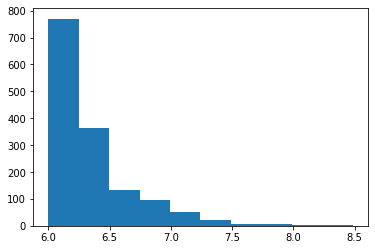

In [59]:
print('redshift distribution of FN:')
plt.hist(fn['z'])

In [60]:
print('w/o snr constraints, probability prediction results:\n')
print('precision:', round(tp.shape[0]/(tp.shape[0]+fp.shape[0]), 4))
print('recall:', round(tp.shape[0]/(tp.shape[0]+fn.shape[0]), 4))

w/o snr constraints, probability prediction results:

precision: 0.9819
recall: 0.66


bins: [6.00019102 6.12432226 6.24845349 6.37258473 6.49671597 6.6208472
 6.74497844 6.86910968 6.99324091 7.11737215 7.24150338 7.36563462
 7.48976586 7.61389709 7.73802833 7.86215956 7.9862908  8.11042204
 8.23455327 8.35868451 8.48281575]
test qso: #/bin: [1.237e+03 9.250e+02 6.460e+02 4.880e+02 3.260e+02 2.040e+02 1.690e+02
 9.500e+01 6.700e+01 3.700e+01 2.700e+01 2.100e+01 8.000e+00 5.000e+00
 5.000e+00 3.000e+00 1.000e+00 2.000e+00 2.000e+00 2.000e+00]
test qso: #/bin: [771. 622. 439. 333. 253. 143. 103.  63.  35.  19.  14.  11.   4.   3.
   2.   0.   1.   0.   1.   1.]


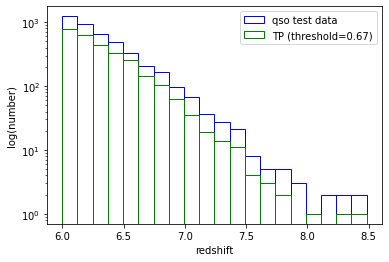

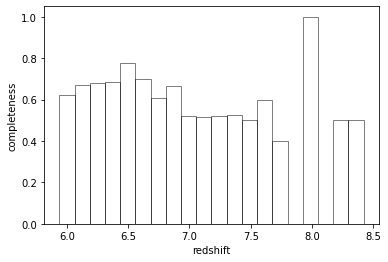

In [61]:
hist11, bins11, _ = plt.hist(qso_test['z'], bins=20, fill=False, label='qso test data', edgecolor='blue')
hist21, bins21, _ = plt.hist(tp['z'], bins11, fill=False, label='TP (threshold=0.67)', edgecolor='green')
print('bins:', bins11)
print('test qso: #/bin:', hist11)
print('test qso: #/bin:', hist21)
plt.xlabel('redshift')
plt.ylabel('log(number)')
plt.yscale('log')
plt.legend()
plt.show()

ratio = hist21/hist11
plt.bar(bins11[:-1], ratio, width=(bins11[1] - bins11[0]), alpha=0.5, label='Density Ratios', fill=False)
plt.xlabel('redshift')
plt.ylabel('completeness')
plt.show()